In [1]:
import pandas as pd
import numpy as np
import time
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn import tree
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import validation_curve
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.model_selection import learning_curve
from sklearn.impute import SimpleImputer
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
######## Data Pre-Processing ########

In [3]:
# Pre-Processing steps for heart disease data.

def pre_process_heart_disease_data():
    # Read heart disease data.
    heart_df = pd.read_csv('heart.csv')

    # Encode string data types to integer (numerical) data type
    heart_df['Sex_n'] = LabelEncoder().fit_transform(heart_df['Sex'])
    heart_df['ChestPainType_n'] = LabelEncoder().fit_transform(heart_df['ChestPainType'])
    heart_df['RestingECG_n'] = LabelEncoder().fit_transform(heart_df['RestingECG'])
    heart_df['ExerciseAngina_n'] = LabelEncoder().fit_transform(heart_df['ExerciseAngina'])
    heart_df['ST_Slope_n'] = LabelEncoder().fit_transform(heart_df['ST_Slope'])

    # Drop columns used to encode
    heart_df_final = heart_df.drop(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], axis='columns')

    # Split dataset into two parts: Train dataset and test dataset.
    # Features
    features_heart = heart_df_final.drop(columns='HeartDisease')

    # Target
    target_heart = heart_df_final['HeartDisease']
    return [features_heart, target_heart]

In [4]:
# Pre-Processing steps for on campus placement data.

def pre_process_on_campus_placement_data():
    # Read on campus placement records data.
    college_df = pd.read_csv('collegePlace.csv')

    # Encode string data types to integer (numerical) data type
    college_df['Gender_n'] = LabelEncoder().fit_transform(college_df['Gender'])
    college_df['Stream_n'] = LabelEncoder().fit_transform(college_df['Stream'])

    # Drop columns used to encode
    college_df_final = college_df.drop(['Gender', 'Stream'], axis='columns')

    # Split dataset into two parts: Train dataset and test dataset.
    # Features
    features_college = college_df_final.drop(columns='PlacedOrNot')

    # Target
    target_college = college_df_final['PlacedOrNot']
    return [features_college, target_college]

In [5]:
######## Plot functions ########

In [6]:
# Validation Curve

def plot_validation_curve(classifier, features_train, target_train, parameter_name,
                          parameter_range, x_label, title, plot_x_axis_log_scale=False):
    train_scores, test_scores = validation_curve(classifier, features_train,
                                                 target_train, param_name=parameter_name,
                                                 param_range=parameter_range, cv=5)

    plt.figure()
    plt.xticks(parameter_range)
    if plot_x_axis_log_scale:
        plt.semilogx(parameter_range, np.mean(train_scores, axis=1), label='Training Score')
        plt.semilogx(parameter_range, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    else:
        plt.plot(parameter_range, np.mean(train_scores, axis=1), label='Training Score')
        plt.plot(parameter_range, np.mean(test_scores, axis=1), label='Cross-Validation Score')
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [7]:
# Learning Curve Function

def plot_learning_curve(classifier, features_train, target_train, plot_title):
    train_sizes, train_scores, test_scores = learning_curve(classifier, features_train,
                                                            target_train, cv=5, scoring='accuracy',
                                                            train_sizes=np.linspace(0.01, 1, 50))
    plt.figure()
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', label='Training Score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', label='Cross-Validation Score')
    plt.title(plot_title)
    plt.xlabel('Number of Training Instances Used')
    plt.ylabel('Accuracy Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

In [8]:
# Compare accuracy score of five learning algorithms

def compare_accuracy_score(classifier_lists, accuracy_lists):
    plt.figure()
    plt.barh(classifier_lists, accuracy_lists)
    plt.title('Compare Accuracy Score')
    plt.xlabel('Accuracy')
    plt.show()

In [9]:
# Compare training time of five learning algorithms

def compare_training_time(classifier_lists, training_time_lists):
    plt.figure()
    plt.barh(classifier_lists, training_time_lists)
    plt.title('Compare Training Time')
    plt.xlabel('Training Time in seconds')
    plt.show()

In [10]:
######## DECISION TREE ########

In [11]:
# Decision Tree Hyperparameter tuning using gridsearchCV

def decision_tree_hyperparameter_tuning(classifier, features_train, target_train):
    grid_param={'max_depth':np.arange(1, 21)}
    grid_search=GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
    grid_search.fit(features_train, target_train)
    grid_search_best_param = grid_search.best_params_['max_depth']
    print('Grid Search Best Parameter:', grid_search.best_params_)
    return grid_search_best_param

In [12]:
# Implement Decision tree algorithm

def implement_decision_tree(features, target):
    # Split dataset into training set and test set
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                test_size=0.3, random_state=42)

    # Create Decision Tree classifer object
    decision_tree = DecisionTreeClassifier(random_state=42)

    # Train Decision Tree Classifer
    decision_tree = decision_tree.fit(features_train, target_train)

    #Predict the response for test dataset
    target_test_predict = decision_tree.predict(features_test)

    # Model Accuracy
    accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Decision tree Accuracy score before hyperparamter tuning:', accuracy_score)

    # Plot Validation Curve
    plot_validation_curve(decision_tree, features_train, target_train, 'max_depth', np.arange(1, 21),
                          'Max Tree Depth', 'Validation Curve for Decision Tree')

    # Hyperparameter tuning using gridsearchCV
    time_start = time.time()
    decision_tree_best_param = decision_tree_hyperparameter_tuning(decision_tree, features_train, target_train)
    time_end = time.time()
    decision_tree_training_time = time_end - time_start

    # Construct Decision tree using best hyperparameter
    final_decision_tree = DecisionTreeClassifier(max_depth=decision_tree_best_param, random_state=42)
    final_decision_tree = final_decision_tree.fit(features_train, target_train)

    # Plot Learning Curve
    plot_learning_curve(final_decision_tree, features_train, target_train, 'Learning Curve for Decision Tree')

    #Predict the response for test dataset
    target_test_predict = final_decision_tree.predict(features_test)
    final_accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Decision tree Accuracy score after hyperparameter tuning:', final_accuracy_score)
    print('Decision tree Training time:', decision_tree_training_time)
    return [decision_tree_training_time, final_accuracy_score]

In [13]:
######## NEURAL NETWORKS ########

In [14]:
# Neural Network Hyperparameter tuning using gridsearchCV

def neural_network_hyperparameter_tuning(classifier, features_train, target_train):
    grid_param={'hidden_layer_sizes': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    grid_search=GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
    grid_search.fit(features_train, target_train)
    grid_search_best_param = grid_search.best_params_['hidden_layer_sizes']
    print('Grid Search Best Parameter:', grid_search.best_params_)
    return grid_search_best_param

In [15]:
# Implement Neural network algorithm

def implement_neural_network(features, target):
    # Split dataset into training set and test set
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                test_size=0.3, random_state=42)

    # Create Neural Network classifer object
    neural_network = MLPClassifier(max_iter=1000, random_state=42)

    # Train Neural Network Classifer
    neural_network = neural_network.fit(features_train, target_train)

    #Predict the response for test dataset
    target_test_predict = neural_network.predict(features_test)

    # Model Accuracy
    accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Neural Network Accuracy score before hyperparamter tuning:', accuracy_score)

    # Plot Validation Curve
    layer_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    plot_validation_curve(neural_network, features_train, target_train, 'hidden_layer_sizes', layer_range,
                          'Number of Hidden Layers', 'Validation Curve for Neural Network')

    # Hyperparameter tuning using gridsearchCV
    time_start = time.time()
    neural_network_best_param = neural_network_hyperparameter_tuning(neural_network, features_train, target_train)
    time_end = time.time()
    neural_network_training_time = time_end - time_start

    # Construct Neural Network using best hyperparameter
    final_neural_network = MLPClassifier(hidden_layer_sizes=neural_network_best_param, max_iter=10000, random_state=42)
    final_neural_network = final_neural_network.fit(features_train, target_train)

    # Plot Learning Curve
    plot_learning_curve(final_neural_network, features_train, target_train, 'Learning Curve for Neural Network')

    #Predict the response for test dataset
    target_test_predict = final_neural_network.predict(features_test)
    final_accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Neural Network Accuracy score after hyperparameter tuning:', final_accuracy_score)
    print('Neural Network Training time:', neural_network_training_time)
    return [neural_network_training_time, final_accuracy_score]

In [16]:
######## BOOSTING ########

In [17]:
# Boosting Hyperparameter tuning using gridsearchCV

def boosting_hyperparameter_tuning(classifier, features_train, target_train):
    grid_param={'n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]}
    grid_search=GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
    grid_search.fit(features_train, target_train)
    grid_search_best_param = grid_search.best_params_['n_estimators']
    print('Grid Search Best Parameter:', grid_search.best_params_)
    return grid_search_best_param

In [18]:
# Implement Boosting algorithm

def implement_boosting(features, target):
    # Split dataset into training set and test set
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                test_size=0.3, random_state=42)

    # Create Gradient Boosting classifer object
    boosted_tree = GradientBoostingClassifier(random_state=42)

    # Train Gradient Boosting Classifer
    boosted_tree = boosted_tree.fit(features_train, target_train)

    #Predict the response for test dataset
    target_test_predict = boosted_tree.predict(features_test)

    # Model Accuracy
    accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Boosting Accuracy score before hyperparamter tuning:', accuracy_score)

    # Plot Validation Curve
    estimator_range = [10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
    plot_validation_curve(boosted_tree, features_train, target_train, 'n_estimators', estimator_range,
                          'Number of Estimators', 'Validation Curve for Boosting')

    # Hyperparameter tuning using gridsearchCV
    time_start = time.time()
    boosted_tree_best_param = boosting_hyperparameter_tuning(boosted_tree, features_train, target_train)
    time_end = time.time()
    boosting_training_time = time_end - time_start

    # Construct Gradient Boosting using best hyperparameter
    final_boosted_tree = GradientBoostingClassifier(n_estimators=boosted_tree_best_param, random_state=42)
    final_boosted_tree = final_boosted_tree.fit(features_train, target_train)

    # Plot Learning Curve
    plot_learning_curve(final_boosted_tree, features_train, target_train, 'Learning Curve for Boosting')

    #Predict the response for test dataset
    target_test_predict = final_boosted_tree.predict(features_test)
    final_accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('Boosting Accuracy score after hyperparameter tuning:', final_accuracy_score)
    print('Boosting Training time:', boosting_training_time)
    return [boosting_training_time, final_accuracy_score]

In [19]:
######## SUPPORT VECTOR MACHINES ########

In [20]:
# Support Vector Machines Hyperparameter tuning using gridsearchCV

def svm_hyperparameter_tuning(classifier, features_train, target_train):
    grid_param={'C':np.logspace(-3, 5, 9)}
    grid_search=GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
    grid_search.fit(features_train, target_train)
    grid_search_best_param = grid_search.best_params_['C']
    print('Grid Search Best Parameter:', grid_search.best_params_)
    return grid_search_best_param

In [21]:
# Implement Support Vector Machines algorithm

def implement_svm(features, target):
    # Split dataset into training set and test set
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                test_size=0.3, random_state=42)

    # Create Support Vector Machines classifer object
    kernel_functions = ['rbf', 'sigmoid']
    svm_list = []
    target_test_predict_list = []
    accuracy_score_list = []
    for kernel in kernel_functions:
        svm = SVC(kernel=kernel, random_state=42)
        # Train Support Vector Machines Classifer
        svm = svm.fit(features_train, target_train)
        # Predict the response for test dataset
        target_test_predict = svm.predict(features_test)
        # Model Accuracy
        accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
        svm_list.append(svm)
        target_test_predict_list.append(target_test_predict)
        accuracy_score_list.append(accuracy_score)

    print('Kernel function accuracy scores: {0} - {1}, {2} - {3}'.format(kernel_functions[0], accuracy_score_list[0],
                                                                        kernel_functions[1], accuracy_score_list[1]))
    accuracy_score = max(accuracy_score_list)
    max_index_accuracy_score = accuracy_score_list.index(accuracy_score)
    best_kernel_function = kernel_functions[max_index_accuracy_score]
    svm = svm_list[max_index_accuracy_score]
    target_test_predict = target_test_predict_list[max_index_accuracy_score]
    print('Best performing Kernel function used:', best_kernel_function)

    print('SVM Accuracy score before hyperparamter tuning:', accuracy_score)

    # Plot Validation Curve
    plot_validation_curve(svm, features_train, target_train, 'C', np.logspace(-3, 5, 9),
                          'Regularization', 'Validation Curve for Support Vector Machines', True)

    # Hyperparameter tuning using gridsearchCV
    time_start = time.time()
    svm_best_param = svm_hyperparameter_tuning(svm, features_train, target_train)
    time_end = time.time()
    svm_training_time = time_end - time_start

    # Construct Support Vector Machines using best hyperparameter
    final_svm = SVC(kernel=best_kernel_function, C=svm_best_param, random_state=42)
    final_svm = final_svm.fit(features_train, target_train)

    # Plot Learning Curve
    plot_learning_curve(final_svm, features_train, target_train, 'Learning Curve for Support Vector Machines')

    # Predict the response for test dataset
    target_test_predict = final_svm.predict(features_test)
    final_accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('SVM Accuracy score after hyperparameter tuning:', final_accuracy_score)
    print('SVM Training time:', svm_training_time)
    return [svm_training_time, final_accuracy_score]

In [22]:
######## K-NEAREST NEIGHBORS ########

In [23]:
# Decision Tree Hyperparameter tuning using gridsearchCV

def knn_hyperparameter_tuning(classifier, features_train, target_train):
    grid_param={'n_neighbors':np.arange(1, 11)}
    grid_search=GridSearchCV(estimator=classifier, param_grid=grid_param, cv=5, n_jobs=-1)
    grid_search.fit(features_train, target_train)
    grid_search_best_param = grid_search.best_params_['n_neighbors']
    print('Grid Search Best Parameter:', grid_search.best_params_)
    return grid_search_best_param

In [24]:
# Implement K-nearest neighbors algorithm

def implement_knn(features, target):
    # Split dataset into training set and test set
    features_train, features_test, target_train, target_test = train_test_split(features, target,
                                                                                test_size=0.3, random_state=42)

    # Create KNN classifer object
    knn = KNeighborsClassifier(n_neighbors=3)

    # Train KNN Classifer
    knn = knn.fit(features_train, target_train)

    #Predict the response for test dataset
    target_test_predict = knn.predict(features_test)

    # Model Accuracy
    accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('KNN Accuracy score before hyperparamter tuning:', accuracy_score)

    # Plot Validation Curve
    plot_validation_curve(knn, features_train, target_train, 'n_neighbors', np.arange(1,11),
                          'Number of Neighbors', 'Validation Curve for k-Nearest Neighbors')

    # Hyperparameter tuning using gridsearchCV
    time_start = time.time()
    knn_best_param = knn_hyperparameter_tuning(knn, features_train, target_train)
    time_end = time.time()
    knn_training_time = time_end - time_start

    # Construct KNN using best hyperparameter
    final_knn = KNeighborsClassifier(n_neighbors=knn_best_param)
    final_knn = final_knn.fit(features_train, target_train)

    # Plot Learning Curve
    plot_learning_curve(final_knn, features_train, target_train, 'Learning Curve for k-Nearest Neighbors')

    #Predict the response for test dataset
    target_test_predict = final_knn.predict(features_test)
    final_accuracy_score = metrics.accuracy_score(target_test, target_test_predict)
    print('KNN Accuracy score after hyperparameter tuning:', final_accuracy_score)
    print('KNN Training time:', knn_training_time)
    return [knn_training_time, final_accuracy_score]

In [25]:
def heart_data_supervised_learning():
    features_heart, target_heart = pre_process_heart_disease_data()
    dt_training_time, dt_accuracy_score = implement_decision_tree(features_heart, target_heart)
    neural_training_time, neural_accuracy_score = implement_neural_network(features_heart, target_heart)
    boosting_training_time, boosting_accuracy_score = implement_boosting(features_heart, target_heart)
    svm_training_time, svm_accuracy_score = implement_svm(features_heart, target_heart)
    knn_training_time, knn_accuracy_score = implement_knn(features_heart, target_heart)
    classifier_lists = ['Decision Tree', 'Neural Network', 'Gradient Boosting', 'SVM', 'KNN']
    accuracy_lists = [dt_accuracy_score, neural_accuracy_score, boosting_accuracy_score,
                      svm_accuracy_score, knn_accuracy_score]
    training_time_lists = [dt_training_time, neural_training_time, boosting_training_time,
                           svm_training_time, knn_training_time]
    compare_accuracy_score(classifier_lists, accuracy_lists)
    compare_training_time(classifier_lists, training_time_lists)

In [26]:
def on_campus_supervised_learning():
    features_college, target_college = pre_process_on_campus_placement_data()
    dt_training_time, dt_accuracy_score = implement_decision_tree(features_college, target_college)
    neural_training_time, neural_accuracy_score = implement_neural_network(features_college, target_college)
    boosting_training_time, boosting_accuracy_score = implement_boosting(features_college, target_college)
    svm_training_time, svm_accuracy_score = implement_svm(features_college, target_college)
    knn_training_time, knn_accuracy_score = implement_knn(features_college, target_college)
    classifier_lists = ['Decision Tree', 'Neural Network', 'Gradient Boosting', 'SVM', 'KNN']
    accuracy_lists = [dt_accuracy_score, neural_accuracy_score, boosting_accuracy_score,
                      svm_accuracy_score, knn_accuracy_score]
    training_time_lists = [dt_training_time, neural_training_time, boosting_training_time,
                           svm_training_time, knn_training_time]
    compare_accuracy_score(classifier_lists, accuracy_lists)
    compare_training_time(classifier_lists, training_time_lists)

Decision tree Accuracy score before hyperparamter tuning: 0.75


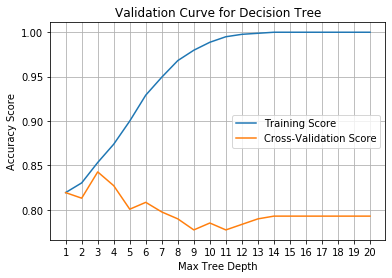

Grid Search Best Parameter: {'max_depth': 3}


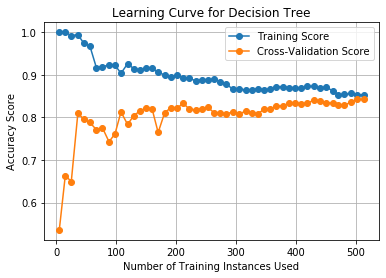

Decision tree Accuracy score after hyperparameter tuning: 0.8333333333333334
Decision tree Training time: 2.0008528232574463
Neural Network Accuracy score before hyperparamter tuning: 0.822463768115942


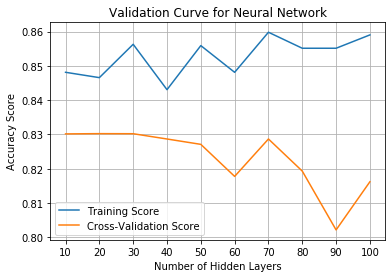

Grid Search Best Parameter: {'hidden_layer_sizes': 20}


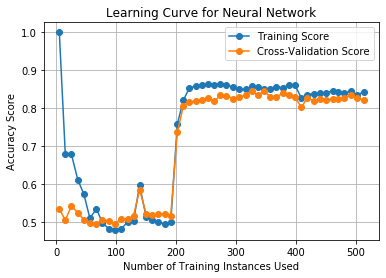

Neural Network Accuracy score after hyperparameter tuning: 0.8586956521739131
Neural Network Training time: 3.128319025039673
Boosting Accuracy score before hyperparamter tuning: 0.8586956521739131


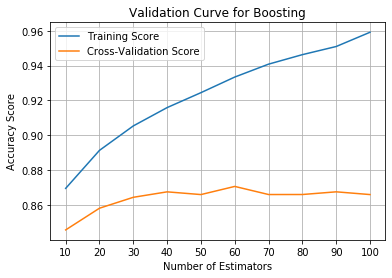

Grid Search Best Parameter: {'n_estimators': 60}


/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 423, in fit
    y = self._validate_y(y, sample_weight)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 1110, in _validate_y
    % n_trim_classes)
ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

  FitFailedWarning)
/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: E

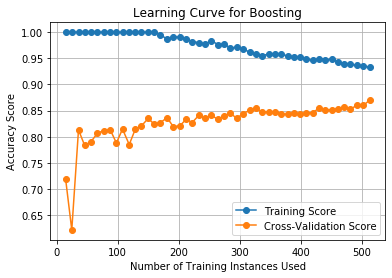

Boosting Accuracy score after hyperparameter tuning: 0.8623188405797102
Boosting Training time: 1.019836187362671
Kernel function accuracy scores: rbf - 0.7246376811594203, sigmoid - 0.4782608695652174
Best performing Kernel function used: rbf
SVM Accuracy score before hyperparamter tuning: 0.7246376811594203


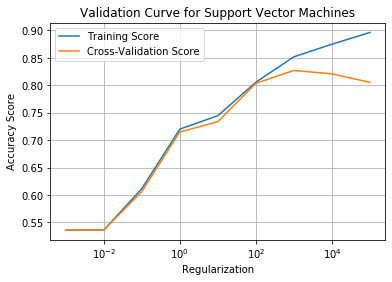

Grid Search Best Parameter: {'C': 1000.0}


/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)
/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition fo

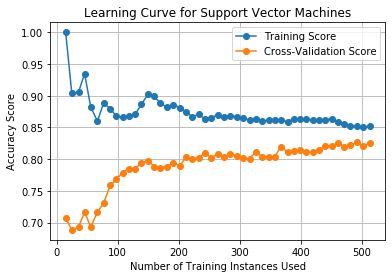

SVM Accuracy score after hyperparameter tuning: 0.855072463768116
SVM Training time: 5.4162209033966064
KNN Accuracy score before hyperparamter tuning: 0.6956521739130435


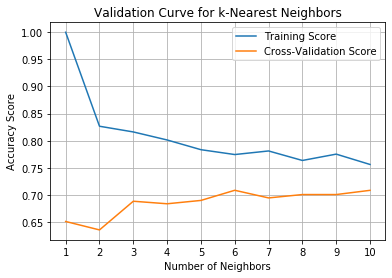

Grid Search Best Parameter: {'n_neighbors': 6}


/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classificat

/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:700: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 687, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 200, in __call__
    sample_weight=sample_weight)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 236, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/metrics/_scorer.py", line 53, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/neighbors/_classificat

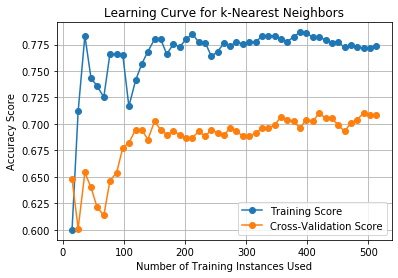

KNN Accuracy score after hyperparameter tuning: 0.7028985507246377
KNN Training time: 0.16385483741760254


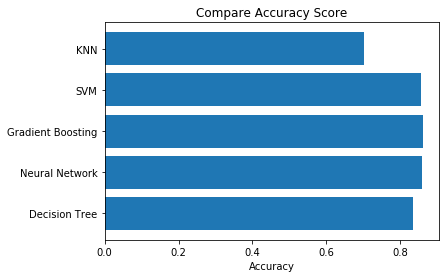

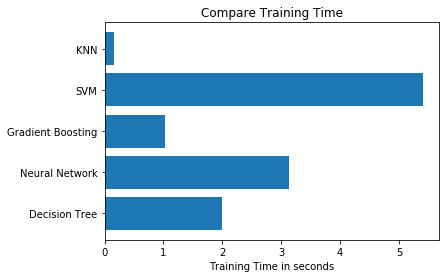

In [27]:
# Running this function takes about 2 minutes.
heart_data_supervised_learning()

Decision tree Accuracy score before hyperparamter tuning: 0.8707865168539326


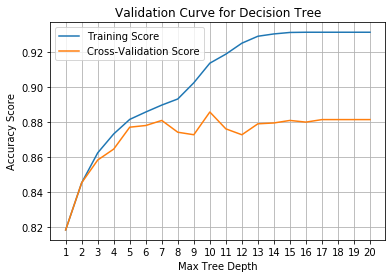

Grid Search Best Parameter: {'max_depth': 10}


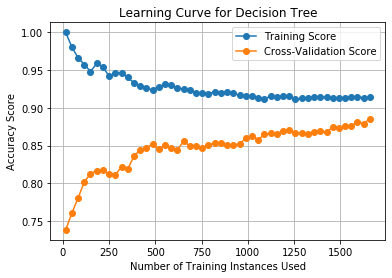

Decision tree Accuracy score after hyperparameter tuning: 0.8764044943820225
Decision tree Training time: 0.23740577697753906
Neural Network Accuracy score before hyperparamter tuning: 0.8438202247191011


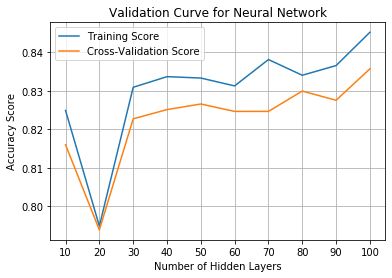

Grid Search Best Parameter: {'hidden_layer_sizes': 100}


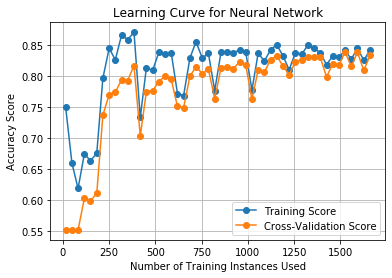

Neural Network Accuracy score after hyperparameter tuning: 0.8438202247191011
Neural Network Training time: 21.68402099609375
Boosting Accuracy score before hyperparamter tuning: 0.8853932584269663


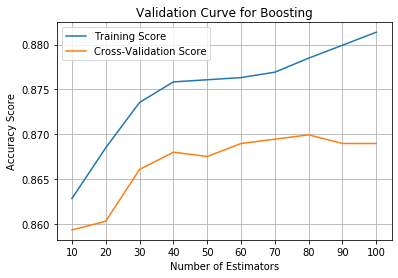

Grid Search Best Parameter: {'n_estimators': 80}


/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 423, in fit
    y = self._validate_y(y, sample_weight)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/_gb.py", line 1110, in _validate_y
    % n_trim_classes)
ValueError: y contains 1 class after sample_weight trimmed classes with zero weights, while a minimum of 2 classes are required.

  FitFailedWarning)


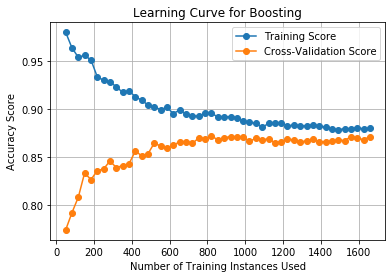

Boosting Accuracy score after hyperparameter tuning: 0.8808988764044944
Boosting Training time: 2.5780580043792725
Kernel function accuracy scores: rbf - 0.755056179775281, sigmoid - 0.5662921348314607
Best performing Kernel function used: rbf
SVM Accuracy score before hyperparamter tuning: 0.755056179775281


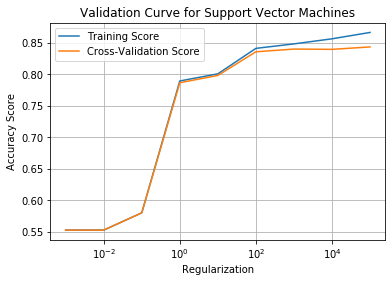

Grid Search Best Parameter: {'C': 100000.0}


/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py:619: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 173, in fit
    y = self._validate_targets(y)
  File "/Users/bumlakkim/anaconda3/lib/python3.7/site-packages/sklearn/svm/_base.py", line 560, in _validate_targets
    " class" % len(cls))
ValueError: The number of classes has to be greater than one; got 1 class

  FitFailedWarning)


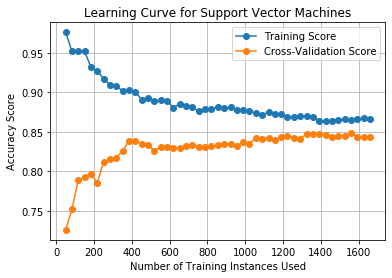

SVM Accuracy score after hyperparameter tuning: 0.8539325842696629
SVM Training time: 23.156840085983276
KNN Accuracy score before hyperparamter tuning: 0.849438202247191


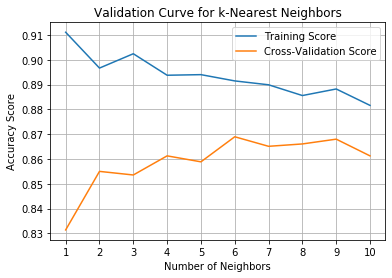

Grid Search Best Parameter: {'n_neighbors': 6}


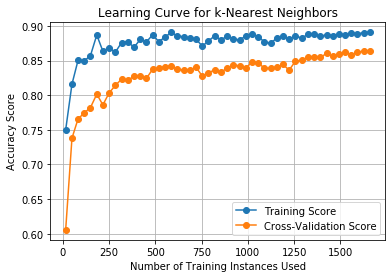

KNN Accuracy score after hyperparameter tuning: 0.8539325842696629
KNN Training time: 2.109405040740967


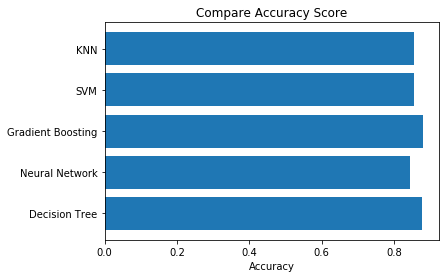

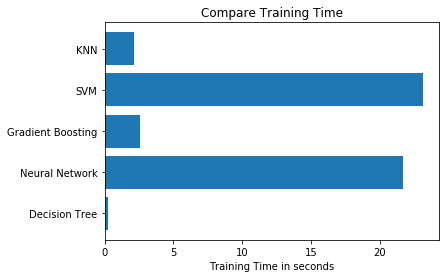

In [28]:
# Running this function takes about 18 minutes.
on_campus_supervised_learning()